## Actividad modulo 27 - Regresión lineal multivariable

#### I took the dataset from:
- https://www.kaggle.com/datasets/ashydv/housing-dataset

### Descripción de los campos

- Price (#)
- Area (#)
- Bedroom (#)
- Bathroom (#)
- Stories (#)
- Mainroad (yes/no)
- guestroom (yes/no)
- basement (yes/no)
- hotwaterheating (yes/no)
- airconditioning (yes/no)
- parking (#)
- prefarea(yes/no)
- furnishingstatus (furnished, semi-furnished, ununfurnished)

- En este caso la idea seria predecir el precio de las casas, basado en los 545 registros del dataset

In [114]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 27')

df = pd.read_csv('Housing.csv')

## Exploratory Data Analysis (EDA)

In [115]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
153,5530000,3300,3,3,2,yes,no,yes,no,no,0,no,semi-furnished
256,4480000,4000,3,1,2,yes,no,no,no,no,2,no,furnished
507,2590000,3600,2,1,1,yes,no,no,no,no,0,no,unfurnished
268,4382000,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
227,4690000,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished


In [116]:
# Validar cuantas celdas en total son nulas
print ('Existen', df.isnull().sum().sum(),'valores no existentes')

Existen 0 valores no existentes


In [117]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [118]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [119]:
# Obtener los principales estadisticos por cada uno
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.000,4766729.248,1870439.616,1750000.000,3430000.000,4340000.000,5740000.000,13300000.000
area,545.000,5150.541,2170.141,1650.000,3600.000,4600.000,6360.000,16200.000
bedrooms,545.000,2.965,0.738,1.000,2.000,3.000,3.000,6.000
bathrooms,545.000,1.286,0.502,1.000,1.000,1.000,2.000,4.000
stories,545.000,1.806,0.867,1.000,1.000,2.000,2.000,4.000
parking,545.000,0.694,0.862,0.000,0.000,0.000,1.000,3.000


In [120]:
# Se ve el total de los valores unicos por cada columna
# Al parecer es un buen data set de datos, no tiene tanta variabilidad en las respuestas, lo que hace que se a mas facil su prediccion
# Ademas se confirma en los valores yes/no y furnished, que tienen 2 y 3 valores, correspondientemente
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

### Feature Engineering

In [121]:
# Antes de seguir se cambian las columnas que tienen valores en caneda a numeros
# yes/no por 1/0
# furnished/semi-furnished/unfornished:1/2/3
object_columns=[col for col in df.columns if (df[col].dtypes=='object')]
object_columns.remove('furnishingstatus')
for j in object_columns:
   df[j]=df[j].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

In [122]:
# Se revisa la nueva estructura
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
34,8120000,6840,5,1,2,1,1,1,0,1,1,0,1
108,6107500,3240,4,1,3,1,0,0,0,0,1,0,2
290,4200000,2610,4,3,2,0,0,0,0,0,0,0,2
510,2520000,2880,3,1,1,0,0,0,0,0,0,0,3
483,2940000,6615,3,1,2,1,0,0,0,0,0,0,2


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


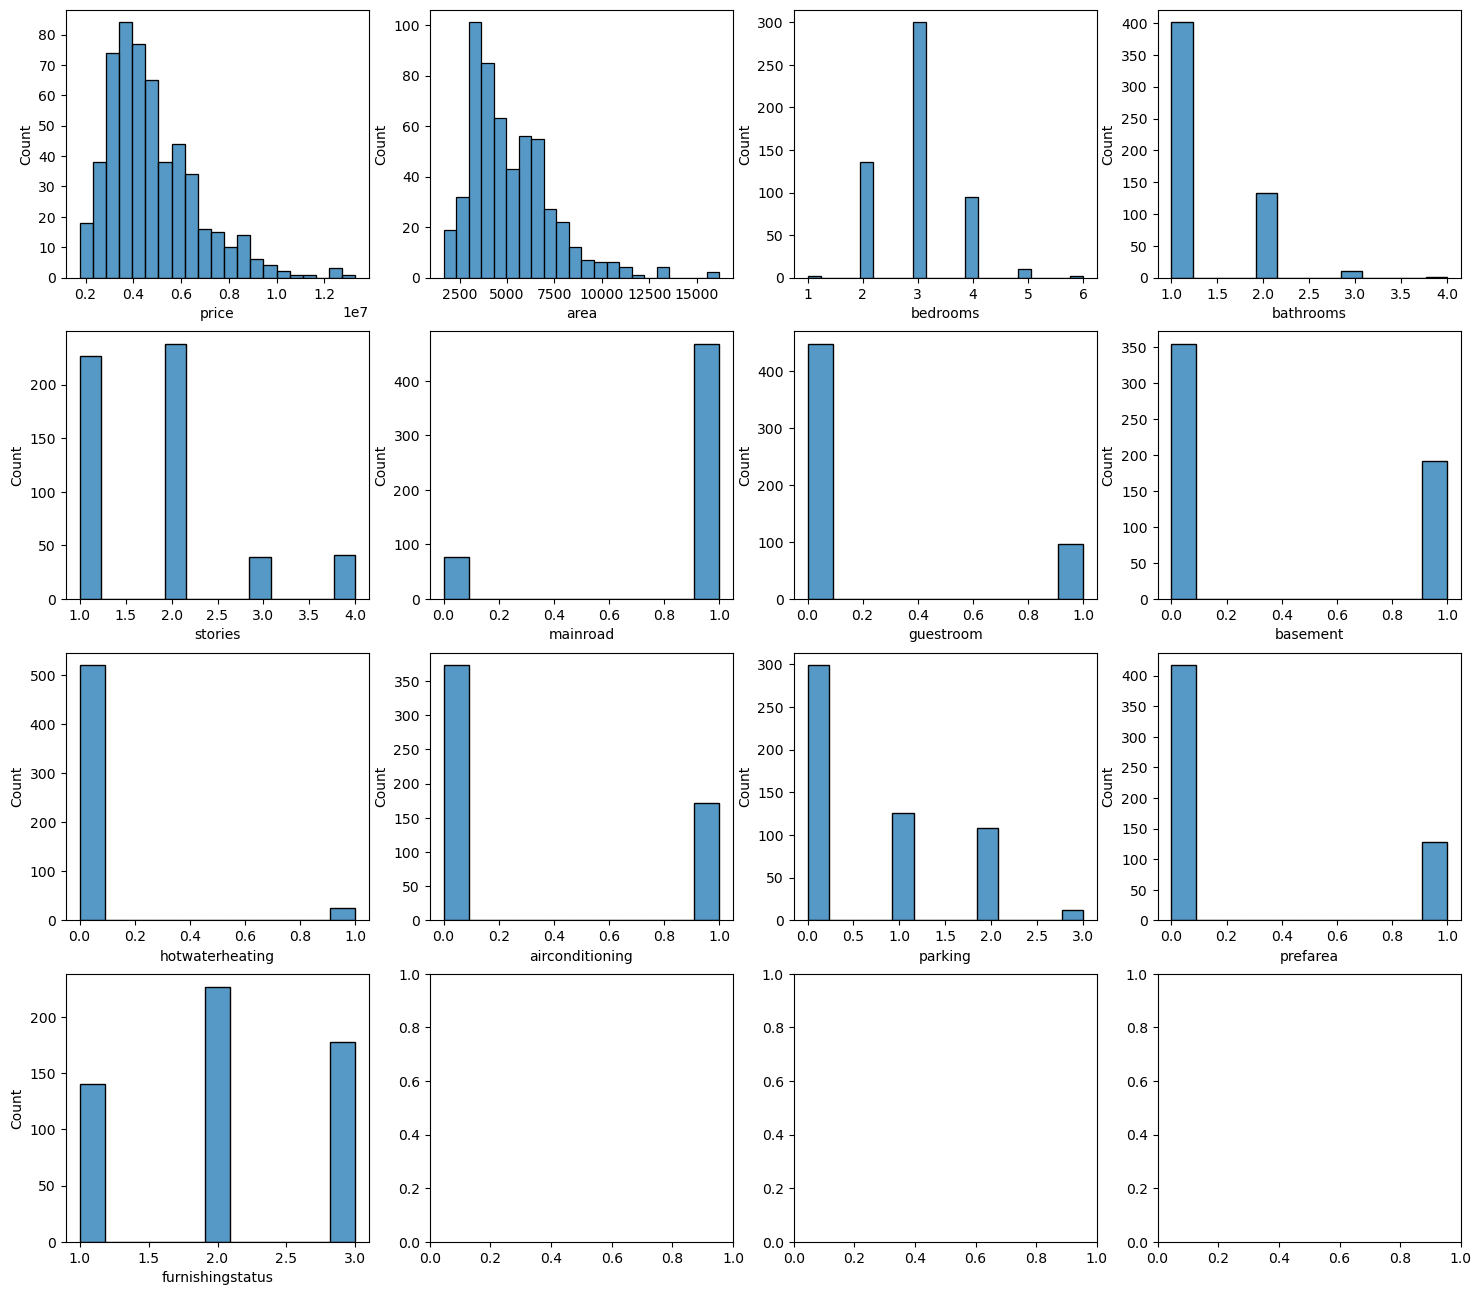

In [124]:
# Grafico exploratorio de todas las columnas 
cols_num=df.columns.to_list()

fig, axes = plt.subplots(nrows=4,ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column],ax=axes[i//4,i%4],kde=False)

## Analisis Correlacion / Bivariado

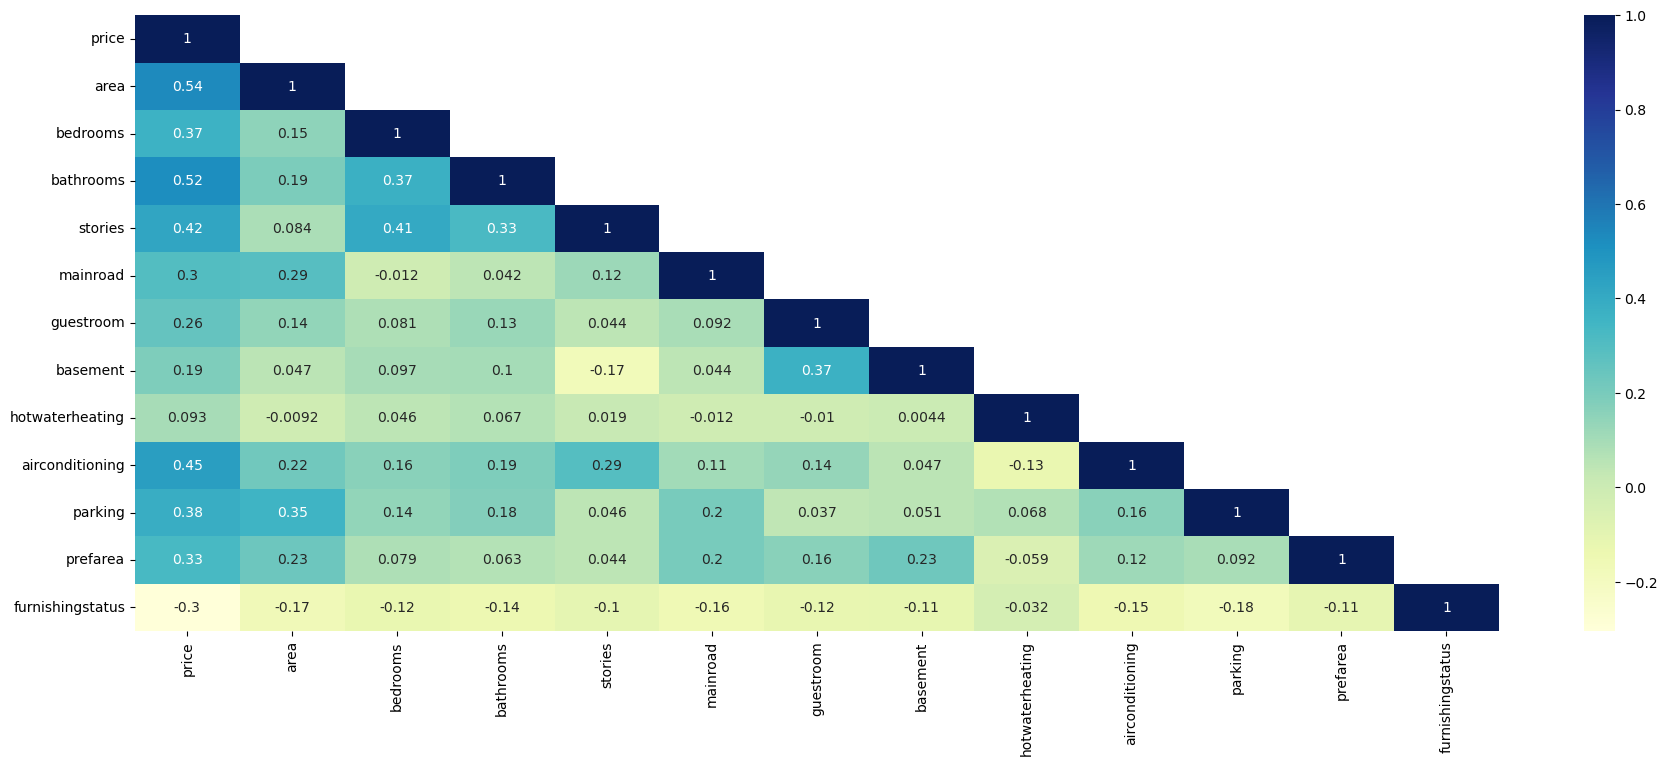

In [125]:
# Grafica de Correlacion
plt.figure(figsize=(22,8))
corr_df = corr= df.corr(method='pearson')
df_lt=corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='YlGnBu',annot=True)

### Insights
- No se encuentra una correlación significativa entre las variables independientes. Por lo cual no es necesario eliminar ninguna de ellas.

### Balance de clases

In [126]:
columns= df.columns.to_list()
categ_columns = [column for column in columns if (column != 'area') & (column !='price')]
categ_columns

['bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [127]:
for column in categ_columns:
    helper = df.groupby(column)[column].count().rename('total').reset_index()

    helper['percent']=(helper['total']/helper['total'].sum())*100
    print('\n' + column)
    print(helper)


bedrooms
   bedrooms  total  percent
0         1      2    0.367
1         2    136   24.954
2         3    300   55.046
3         4     95   17.431
4         5     10    1.835
5         6      2    0.367

bathrooms
   bathrooms  total  percent
0          1    401   73.578
1          2    133   24.404
2          3     10    1.835
3          4      1    0.183

stories
   stories  total  percent
0        1    227   41.651
1        2    238   43.670
2        3     39    7.156
3        4     41    7.523

mainroad
   mainroad  total  percent
0         0     77   14.128
1         1    468   85.872

guestroom
   guestroom  total  percent
0          0    448   82.202
1          1     97   17.798

basement
   basement  total  percent
0         0    354   64.954
1         1    191   35.046

hotwaterheating
   hotwaterheating  total  percent
0                0    520   95.413
1                1     25    4.587

airconditioning
   airconditioning  total  percent
0                0    373   68.440

#### Parking

    - cambio los valores de '3' por '2' asi la opcion 2 se entiende como + de 1 parking

In [128]:
df['parking'].replace({3:2},inplace=True)

#### Bathrooms
    - cambio los valores de '3' y '4' por '2' asi la opcion 2 se entiende como + de 1 banos

In [129]:
df['bathrooms'].replace({3:2,4:2},inplace=True)

#### Bedrooms
    - cambio los valores de '5' y '6' por '4' asi la opcion 4 se entiende como + de 3 banos
    - elimino los valores de '1' bedroom

In [130]:
df['bedrooms'].replace({5:4,6:4},inplace=True)

df.drop(df[df['bedrooms']==1].index,inplace=True)

In [131]:
for column in categ_columns:
    helper = df.groupby(column)[column].count().rename('total').reset_index()

    helper['percent']=(helper['total']/helper['total'].sum())*100
    print('\n' + column)
    print(helper)


bedrooms
   bedrooms  total  percent
0         2    136   25.046
1         3    300   55.249
2         4    107   19.705

bathrooms
   bathrooms  total  percent
0          1    399   73.481
1          2    144   26.519

stories
   stories  total  percent
0        1    225   41.436
1        2    238   43.831
2        3     39    7.182
3        4     41    7.551

mainroad
   mainroad  total  percent
0         0     76   13.996
1         1    467   86.004

guestroom
   guestroom  total  percent
0          0    446   82.136
1          1     97   17.864

basement
   basement  total  percent
0         0    352   64.825
1         1    191   35.175

hotwaterheating
   hotwaterheating  total  percent
0                0    518   95.396
1                1     25    4.604

airconditioning
   airconditioning  total  percent
0                0    371   68.324
1                1    172   31.676

parking
   parking  total  percent
0        0    297   54.696
1        1    126   23.204
2        2    12

### Generación de variables dummy en el set de datos

In [132]:
df.nunique()

price               219
area                284
bedrooms              3
bathrooms             2
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               3
prefarea              2
furnishingstatus      3
dtype: int64

In [133]:
for col in categ_columns:
    df[col]= df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             543 non-null    int64   
 1   area              543 non-null    int64   
 2   bedrooms          543 non-null    category
 3   bathrooms         543 non-null    category
 4   stories           543 non-null    category
 5   mainroad          543 non-null    category
 6   guestroom         543 non-null    category
 7   basement          543 non-null    category
 8   hotwaterheating   543 non-null    category
 9   airconditioning   543 non-null    category
 10  parking           543 non-null    category
 11  prefarea          543 non-null    category
 12  furnishingstatus  543 non-null    category
dtypes: category(11), int64(2)
memory usage: 20.0 KB


In [134]:
df= pd.get_dummies(df,drop_first=True)
df.sample(5)

,price,area,bedrooms_3,bedrooms_4,bathrooms_2,stories_2,stories_3,stories_4,mainroad_1,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,parking_1,parking_2,prefarea_1,furnishingstatus_2,furnishingstatus_3
83,6580000,6000,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0
315,4095000,5600,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
437,3290000,5880,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
393,3500000,7424,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
247,4550000,8400,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1


### Data split

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Libreria para hacer split entre train y test
from sklearn.metrics import mean_squared_error

# Construccion de los dataframes X e y para la regresion
# Variables independientes
X = df.drop(['price'],axis=1)
# Variables dependientes
y=df[['price']]

# Divide a los dataframes en 70 y 30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1)

### El modelo de Regresion

In [136]:
# Ejecuta la regresion lineal

# Construye el regresor
regression_model=LinearRegression()

# Genera el fit de la regresion en con funcion fit
regression_model.fit(X_train,y_train)

LinearRegression()

In [137]:
# Obtiene el coeficiente de regresion de entrenamiento (R2)
regression_model.score(X_train,y_train)

0.6677872717804468

In [138]:
# Coeficiente de regresion de test
# Es el R2, o cuanto explica el modelo de la data de test
regression_model.score(X_test,y_test)

0.666227118877776

#### Insights

- No se precibe una gran diferencia entre el R2 de este modelo de regresion 
y el del hecho durante la lecion

#### Otras medidas del modelo

In [139]:
# Otras Medidas de Modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred= regression_model.predict(X_test)
# Suma absoluta de las diferencias
mae = mean_absolute_error(y_test,y_pred)
# Suma absoluta de las diferencias al cuadrado
mse = mean_squared_error(y_test, y_pred)
# Raiz cuadrada de la suma absoluta de las diferencias al cuadrado
rmse = np.sqrt(mse)

In [140]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 847499.75
Mean squared error: 1377413021560.65
Root mean squared error: 1173632.40


In [141]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     42.80
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           8.53e-76
Time:                        16:49:47   Log-Likelihood:                -5801.5
No. Observations:                 380   AIC:                         1.164e+04
Df Residuals:                     362   BIC:                         1.171e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.578e+06   2.45

#### Insights

- La mayoria de las variables son estadisticamente significativas
- Al parecer hay un problema de multicolinearidad con las variables independientes.
- Una posible rta es que el numero de banos depende del numero de habitaciones que tiene el
apartamento. A mayor numero de habitaciones, mayor numero de banos.

#### importancia de variables

In [142]:
# Obtiene los coeficientes de la ecuacion
for idx, col_name in enumerate(X_train.columns):
    print('Coef {} = {}'.format(col_name, regression_model.coef_[0][idx]))

Coef area = 254.24400328624608
Coef bedrooms_3 = 223805.9089968321
Coef bedrooms_4 = 266940.17296603194
Coef bathrooms_2 = 991136.0265089186
Coef stories_2 = 376192.51984639396
Coef stories_3 = 843493.7551981165
Coef stories_4 = 1574539.669540347
Coef mainroad_1 = 464254.0462820121
Coef guestroom_1 = 265720.0627023259
Coef basement_1 = 401146.1781159133
Coef hotwaterheating_1 = 1108374.242582496
Coef airconditioning_1 = 686791.1215761018
Coef parking_1 = 387373.1306411324
Coef parking_2 = 552796.9471235962
Coef prefarea_1 = 564830.1558158637
Coef furnishingstatus_2 = -13442.77351442361
Coef furnishingstatus_3 = -322240.66035238776


In [143]:
# Obtiene los coeficientes en un Dataframe
# Se usa la funcion enumerate
# Tener en cuenta el uso de [0] ya que algunas variables vienen en arrays , para obtener el valor completo
coeff_data = pd.DataFrame()

#Intercept
coeff_data = coeff_data .append({'Coeff': regression_model.intercept_[0],'Var':'Intercept'}, ignore_index=True)

# Coeficientes
for idx, col_name in enumerate(X_train.columns):
    coeff_data = coeff_data.append({'Var':col_name,'Coeff':regression_model.coef_[0][idx]}, ignore_index=True)
coeff_data

C:\Users\oscah\AppData\Local\Temp\ipykernel_6040\2710748712.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeff_data = coeff_data .append({'Coeff': regression_model.intercept_[0],'Var':'Intercept'}, ignore_index=True)
C:\Users\oscah\AppData\Local\Temp\ipykernel_6040\2710748712.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeff_data = coeff_data.append({'Var':col_name,'Coeff':regression_model.coef_[0][idx]}, ignore_index=True)
C:\Users\oscah\AppData\Local\Temp\ipykernel_6040\2710748712.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeff_data = coeff_data.append({'Var':col_name,'Coeff':regression_model.coef_[0][idx]}, ignore_index=True)
C:\Users\oscah\AppData\Local\Temp\ipykernel_6040\2710748712.py:11: Fu

,Coeff,Var
0,1578427.468,Intercept
1,254.244,area
2,223805.909,bedrooms_3
3,266940.173,bedrooms_4
4,991136.027,bathrooms_2
5,376192.520,stories_2
6,843493.755,stories_3
7,1574539.670,stories_4
8,464254.046,mainroad_1
9,265720.063,guestroom_1


#### Insights

- En promedio, un aumento de 1m cuadrado genera un aumento de $254 en el precio de la vivienda.
- Los coeficientes que representan una mayor impacto al precio de la vivienda en promedio son:
    * Tener agua caliente y,
    * Que la vivienda este ubicada en un cuarto piso 
- Como era de esperarse, el hecho de que la vivienda no este o parcialmente amueblada indica una
reduccion en el precio de la vivienda.


#### predicción de los resultados del modelo

In [144]:
# Comparacion de Prediccion vs Actual

df_preds = pd.DataFrame({'Actual':y_test.squeeze(), 'Predicted':y_pred.squeeze()})
print(df_preds)

      Actual   Predicted
244  4550000 5213511.664
132  5810000 5105398.344
385  3570000 2645889.026
133  5810000 4694902.856
481  2940000 2264886.277
..       ...         ...
330  3990000 4358017.984
542  1750000 2640804.146
433  3290000 3480259.650
80   6629000 6215278.719
46   7525000 7431791.391

[163 rows x 2 columns]


#### Visualización de los resultados del modelo de regresión

Text(0.5, 1.0, 'Comparacion de Prediccion (x) vs Real (y)')

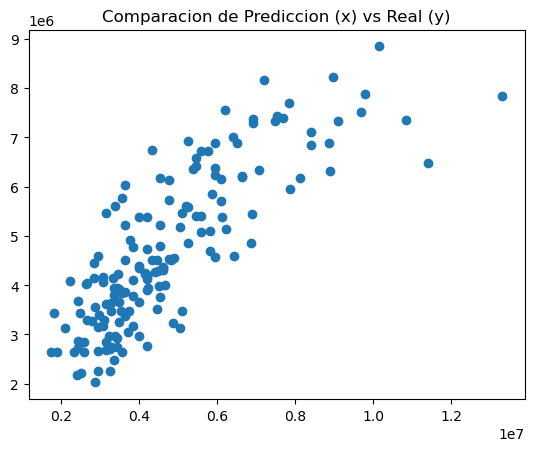

In [145]:
plt.scatter(y_test, y_pred)
plt.title('Comparacion de Prediccion (x) vs Real (y)')

### Bonus: Regression with standardized coefficients

In [146]:
from sklearn.preprocessing import StandardScaler
df1=df.copy()
columns_df1= df1.columns.to_list()

scaler = StandardScaler()
for column in columns_df1:
    df1[column]=StandardScaler().fit_transform(df1[[column]])

df1.sample(5)

,price,area,bedrooms_3,bedrooms_4,bathrooms_2,stories_2,stories_3,stories_4,mainroad_1,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,parking_1,parking_2,prefarea_1,furnishingstatus_2,furnishingstatus_3
520,-1.244,1.172,-1.111,-0.495,-0.601,-0.883,-0.278,-0.286,0.403,-0.466,-0.737,-0.220,-0.681,-0.550,-0.533,-0.555,-0.848,1.438
243,-0.120,-1.201,0.900,-0.495,-0.601,1.132,-0.278,-0.286,0.403,-0.466,1.358,-0.220,-0.681,-0.550,-0.533,-0.555,-0.848,-0.695
432,-0.795,0.417,0.900,-0.495,-0.601,-0.883,-0.278,-0.286,0.403,2.144,1.358,-0.220,-0.681,-0.550,-0.533,-0.555,-0.848,-0.695
401,-0.682,2.002,0.900,-0.495,-0.601,1.132,-0.278,-0.286,0.403,-0.466,-0.737,-0.220,-0.681,-0.550,1.877,1.801,-0.848,1.438
225,-0.011,0.592,-1.111,-0.495,-0.601,-0.883,-0.278,-0.286,0.403,-0.466,-0.737,-0.220,1.469,-0.550,1.877,-0.555,1.180,-0.695


In [147]:
# Construccion de los dataframes X e y para la regresion
# Variables independientes
X1 = df1.drop(['price'],axis=1)
# Variables dependientes
y1=df1[['price']]

# Divide a los dataframes en 70 y 30
X1_train, X1_test, y1_train, y1_test= train_test_split(X1,y1, test_size=0.3, random_state=1)

In [148]:
# Ejecuta la regresion lineal
# Construye el regresor
regression_model=LinearRegression()

# Genera el fit de la regresion en con funcion fit
regression_model.fit(X1_train,y1_train)

LinearRegression()

In [149]:
# Obtiene el coeficiente de regresion de entrenamiento (R2)
regression_model.score(X1_train,y1_train)

0.667787271780447

In [150]:
# Coeficiente de regresion de test
# Es el R2, o cuanto explica el modelo de la data de test
regression_model.score(X1_test,y1_test)

0.6662271188777761

In [151]:
X2 = sm.add_constant(X1_train)
est = sm.OLS(y1_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     42.80
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           8.53e-76
Time:                        16:50:50   Log-Likelihood:                -314.25
No. Observations:                 380   AIC:                             664.5
Df Residuals:                     362   BIC:                             735.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0057      0